# Blockdiag Package Diagrams

The [`blockdiag`](http://blockdiag.com/en/) package provides tools for generating several types of diagram, from simple box and arrows diagrams to various diagrams familiar to communications and system engineers.

The diagrams are defined using simple text structures. Various IPython block magics allow these descriptions to be entered directly in to a magicked code cell, and the diagram generated directly therefrom.

The diagrams are generated by default as SVG diagrams and can be saved to a named file if required; `.png `format images may also be created.

All the magics are enabled from a single load command:

In [1]:
%%capture
try:
    import blockdiag_magic
except:
    %pip install blockdiagMagic

In [2]:
%load_ext blockdiag_magic

## Block Diagrams

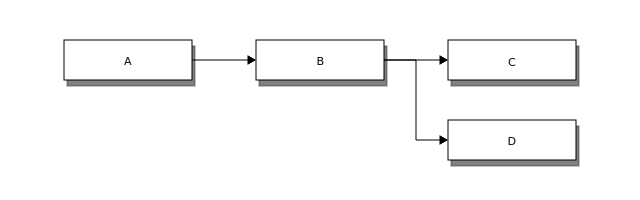

In [3]:
%%blockdiag
A -> B -> C;
B -> D;

## Network Diagrams

The *network diagram* type can be used to demonstrate the connectivity of nodes to different IP (internet protocol) network ranges.

In the following diagram, we save the SVG image to an explicit file as an additional output. (The direct output is hidden using a publishing system tag in the original source document.)

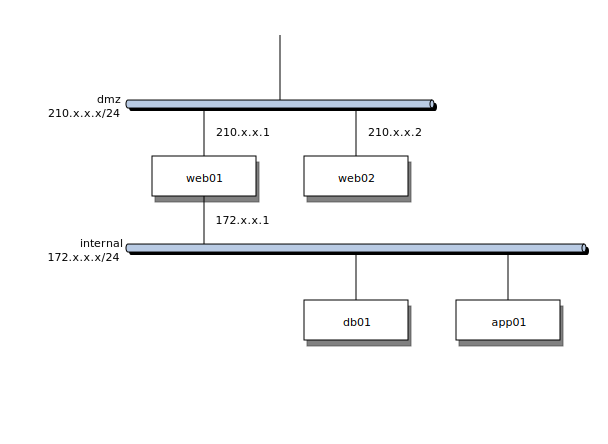

In [4]:
%%nwdiag --outfile demo1.svg
  network dmz {
      address = "210.x.x.x/24"

      web01 [address = "210.x.x.1"];
      web02 [address = "210.x.x.2"];
  }
  network internal {
      address = "172.x.x.x/24";

      web01 [address = "172.x.x.1"];
      db01;
      app01;
  }

We can then explicitly render the image, from the saved file, as required:

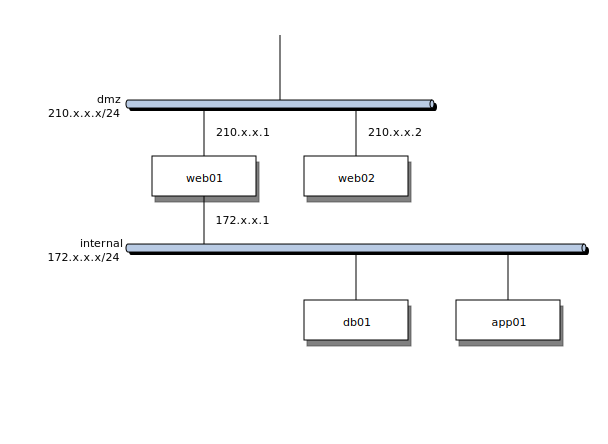

In [5]:
from IPython.display import SVG
SVG('demo1.svg')

Nodes can also be grouped in coloured blocks.

The network diagram type can also be used to sketch higher level network diagrams:

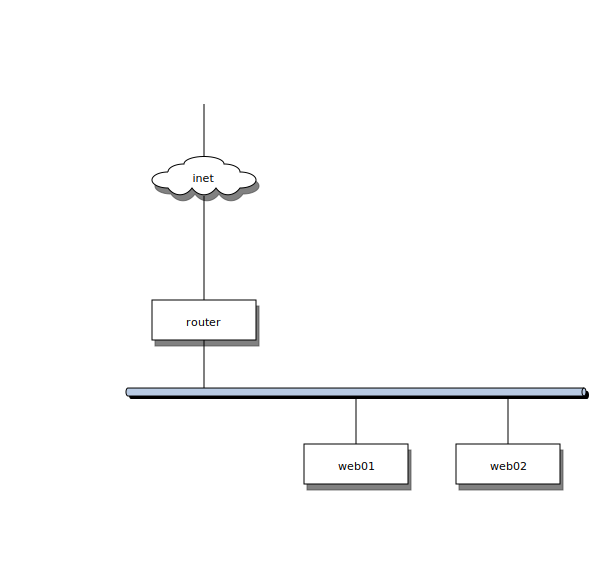

In [6]:
%%nwdiag

  inet [shape = cloud];
  inet -- router;

  network {
    router;
    web01;
    web02;
  }


## Activity Diagrams

The activity diagram type can be used to describe a linear series of activities carried out by one or more actors:

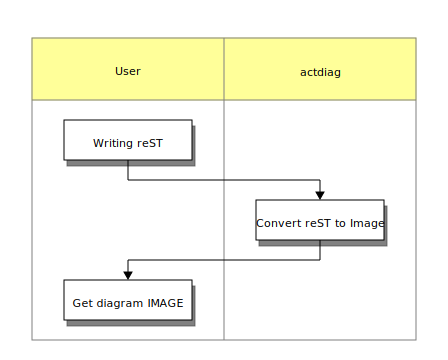

In [7]:
%%actdiag --outfile delme1.svg
  write -> convert -> image

  lane user {
     label = "User"
     write [label = "Writing reST"];
     image [label = "Get diagram IMAGE"];
  }
  lane actdiag {
     convert [label = "Convert reST to Image"];
  }


## Sequence Diagram

A sequence diagram can be used to visualise the message passing sequence used by a communication protocol.

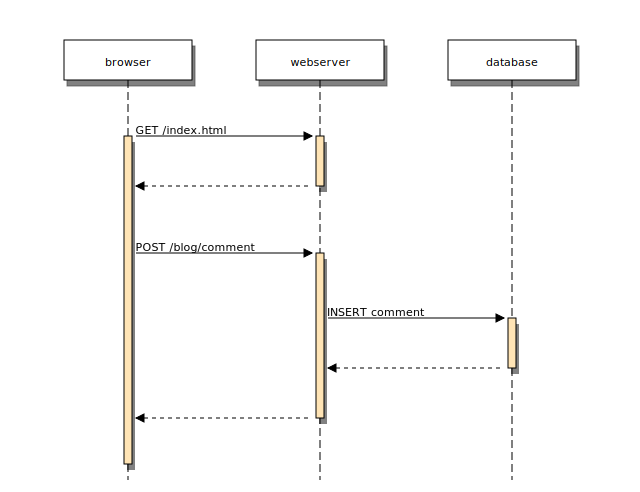

In [8]:
%%seqdiag
browser  -> webserver [label = "GET /index.html"];
browser <-- webserver;
browser  -> webserver [label = "POST /blog/comment"];
          webserver  -> database [label = "INSERT comment"];
          webserver <-- database;
browser <-- webserver;



## Packet Diagram

The packet diagram type can be used to illustrate the bit an bytewise structure of a data packet:

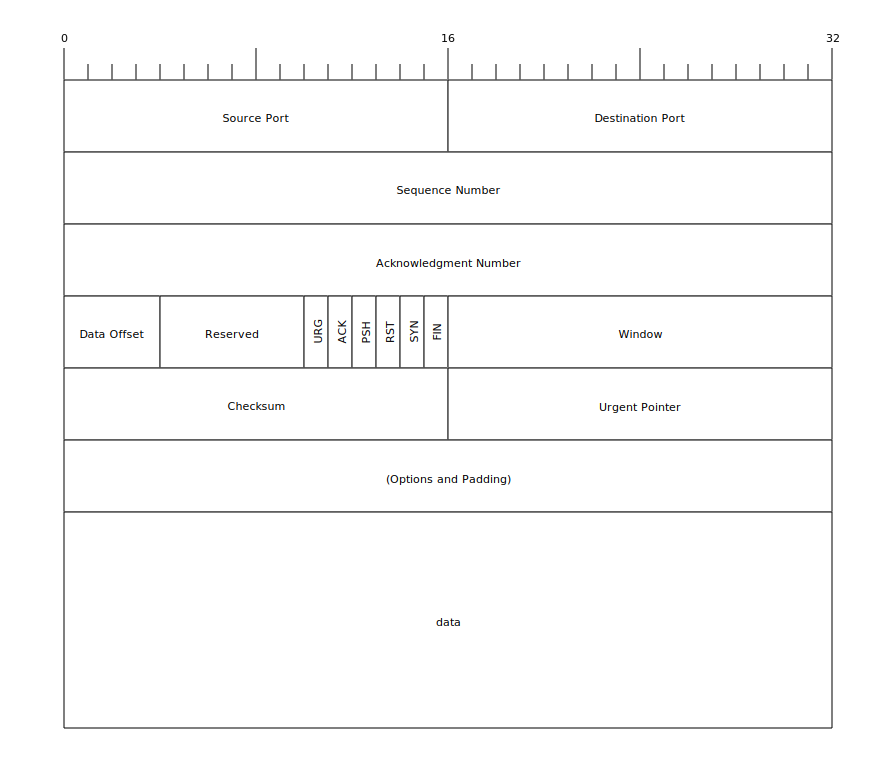

In [9]:
%%packetdiag
  colwidth = 32
  node_height = 72

  0-15: Source Port
  16-31: Destination Port
  32-63: Sequence Number
  64-95: Acknowledgment Number
  96-99: Data Offset
  100-105: Reserved
  106: URG [rotate = 270]
  107: ACK [rotate = 270]
  108: PSH [rotate = 270]
  109: RST [rotate = 270]
  110: SYN [rotate = 270]
  111: FIN [rotate = 270]
  112-127: Window
  128-143: Checksum
  144-159: Urgent Pointer
  160-191: (Options and Padding)
  192-223: data [colheight = 3]

## Rack Diagrams

The rack diagram (`rackdiag`) type is useful for generating diagrams that illustrate the different components that might be present in a physical rack server cabinet.

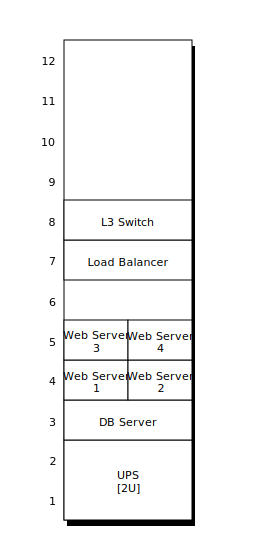

In [10]:
%%rackdiag --outfile delme2.svg

12U

1: UPS [2U];
3: DB Server
4: Web Server 1 
4: Web Server 2
5: Web Server 3
5: Web Server 4
7: Load Balancer
8: L3 Switch
